### pip install & import

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
#import pandas_profiling
import datetime

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

# from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_validate

### 최종데이터 불러오기

In [3]:
movie_final = pd.read_csv('../3_merge_top300/movie_final.csv',encoding='utf-8')

## 원핫인코딩 

In [4]:
# 원핫인코딩

# movie_labels = pd.get_dummies(movie_final,columns = ['국적','장르','등급','계절'])

In [5]:
# 독립 변수와 종속 변수 나눔

# 독립 = movie_DL[['감독_흥행', '배급사_흥행', '국적_기타', '국적_독일', '국적_미국',
#        '국적_영국', '국적_일본', '국적_중국', '국적_프랑스', '국적_한국', '장르_SF', '장르_가족', '장르_공연',
#        '장르_공포(호러)', '장르_기타', '장르_다큐멘터리', '장르_드라마', '장르_멜로/로맨스', '장르_뮤지컬',
#        '장르_미스터리', '장르_범죄', '장르_사극', '장르_서부극(웨스턴)', '장르_성인물(에로)', '장르_스릴러',
#        '장르_애니메이션', '장르_액션', '장르_어드벤처', '장르_전쟁', '장르_코미디', '장르_판타지',
#        '등급_12세관람가', '등급_15세관람가', '등급_전체관람가', '등급_청소년관람불가', '계절_가을', '계절_겨울',
#        '계절_봄', '계절_여름']] 
# 종속 = movie_DL[['전국 관객수']] 

## 라벨링

In [6]:
from sklearn.preprocessing import LabelEncoder

le_form = LabelEncoder()
le_nation = LabelEncoder()
le_genre = LabelEncoder()
le_rating = LabelEncoder()
le_class = LabelEncoder()
le_season = LabelEncoder()

movie_labels = movie_final.copy()
movie_labels['영화형태'] = le_form.fit_transform(movie_final['영화형태'])
movie_labels['국적'] = le_nation.fit_transform(movie_final['국적'])
movie_labels['장르'] = le_genre.fit_transform(movie_final['장르'])
movie_labels['등급'] = le_rating.fit_transform(movie_final['등급'])
movie_labels['영화구분'] = le_class.fit_transform(movie_final['영화구분'])
movie_labels['계절'] = le_season.fit_transform(movie_final['계절'])
movie_labels.drop(['Unnamed: 0'],axis=1,inplace=True)
movie_labels.head(3)


,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,...,영화구분,연도,월,계절,총 관객수,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,2,2,2809,137325939643,10779198,...,1,2022,12,1,112805094,"['시고니 위버', '스티븐 랭', '조 샐다나', '샘 워싱턴', '우나 채플린'...",8.65,0,10,10
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,2,2,1843,88582586366,10494499,...,1,2015,4,2,217299523,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스...",8.32,9,10,76
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,2,7,1948,87459829095,10313086,...,1,2019,5,2,226678777,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']",8.49,10,10,26


### 데이터분배
1) movie_labels_etc : train과 val data   
2) movie_labels_2023 : test data

In [7]:
movie_labels_2023 = movie_labels[movie_labels['연도']==2023]
movie_labels_etc = movie_labels[movie_labels['연도']!=2023]

### 변수 정리   
1. 사용하지 않는 컬럼 제거
2. 독립변수와 종속변수 설정

In [8]:
# 사용하지 않는 컬럼 제거

not_used = ['영화명', '감독', '배급사', '영화형태', '개봉일', '영화구분', '연도', '월']

movie_DL = movie_labels_etc.drop(not_used, axis=1) # 2003~2022 데이터 main
movie_DL2 = movie_labels_2023.drop(not_used, axis=1)# 2023년 test


In [9]:
# 국적 => 국내 vs 해외
# 관객비율.. 2023년 데이터 총 관객수 몰라....
# 비율 말고 총 관객수를 쓰자
# 총관객수 defqult를 2022년으로 해서 2023년 총관객수 채우면 어때?

In [10]:
# # 독립 변수와 종속 변수 나눔

# 독립 = movie_DL[['국적', '장르', '등급', '감독_흥행',
#                '배급사_흥행', '계절', '전국 스크린수', '총 관객수', '주연배우_흥행']]
# 종속 = movie_DL[['전국 관객수']]

In [11]:
# # 독립 변수와 종속 변수 나눔

# 독립_2023 = movie_DL2[['국적', '장르', '등급', '감독_흥행',
#                '배급사_흥행', '계절', '전국 스크린수', '총 관객수', '주연배우_흥행']]
# 종속_2023 = movie_DL2[['전국 관객수']]


In [39]:
종속 = movie_DL[['전국 관객수']].copy()
종속['전국 관객수'] = 종속['전국 관객수'] / 1000

종속_2023 = movie_DL2[['전국 관객수']].copy()
종속_2023['전국 관객수'] = 종속_2023['전국 관객수'] / 1000

독립 = movie_DL[['국적', '장르', '등급', '감독_흥행','총 관객수',
               '배급사_흥행','주연배우_흥행','계절', '전국 스크린수']].copy()
독립['총 관객수'] = 독립['총 관객수'] / 1000

독립_2023 = movie_DL2[['국적','장르', '등급', '감독_흥행','총 관객수',
               '배급사_흥행','주연배우_흥행','계절', '전국 스크린수']].copy()
독립_2023['총 관객수'] = 독립_2023['총 관객수'] / 1000

## train, test 데이터 나누기

In [40]:
# train, test 데이터 나눔

from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(독립,종속,test_size=0.25,random_state=42)

## 스케일링... 
...어디서 할까...<br>
라벨링 때문에 바로 스케일링을 따로 해줘야함 (전국스크린수, 전국매출액)

In [13]:
# # 값 스케일링

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(train_input)
# train_scaled = ss.transform(train_input)
# test_scaled = ss.transform(test_input)

# 딥러닝 


In [31]:
from keras_tuner.tuners import RandomSearch

In [12]:
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import kerastuner as kt

C:\Users\Playdata\AppData\Local\Temp\ipykernel_11516\900127054.py:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [51]:
# # tunner 이용한 하이퍼 파라미터 찾기
# # 해야할 일 : 우리 모델에 맞는 뉴런 수, 활성화 함수 , learning rate, batch_size를 찾아야한다.
# class MyHyperModel(kt.HyperModel):
#   def build(self, hp):
#     # units_1 => 뉴런 개수를 조정하는 부분
#     # dropout_1 => dropout 부분을 조정하는 부분
#     hp_units1 = hp.Int('units_1', min_value = 16, max_value = 180)
#     hp_units2 = hp.Int('units_2', min_value = 16, max_value = 180)
#     hp_units4 = hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.05)
#     hp_units5 = hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.05)

#     # 현재 레이어 층은
#     # 입력층 > 히든층 > 출력층으로 되어있다.
#     model = keras.Sequential()
#     #입력층
#     model.add(layers.Dense(hp_units1, activation='swish', input_shape=[9]))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp_units4))
#     # 히든층
#     model.add(layers.Dense(hp_units2, activation='swish'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp_units5))
#     # 출력층
#     model.add(layers.Dense(1, activation='swish'))

#     # 1. learning rate 범위 설정
#     hp_learning_rate = hp.Float('learning_rate', min_value=1e-6, max_value=1e-3)
#     # 2. 옵티마이저 설정
#     # Choice를 통해 값을 선택에서 받음
#     # hp.int을 쓰면 정수값, hp.Float를 쓰면 소수값, hp.Choice를 쓰면 선택해서
#     # Adam
#     Adam = optimizers.Adam(learning_rate=hp_learning_rate,beta_1=hp.Choice('beta_1',[.9,.8,.7,.6,.5]),beta_2=hp.Choice('beta_2',[.99,.88,.77,.66,.55]))
#     # SGD
#     SGD = optimizers.SGD(learning_rate=hp_learning_rate,momentum=hp.Choice('momentum',[.9,.8,.7,.6,.5]))
#     # 나머지 추가해야함
#     model.compile(optimizer=SGD, loss='mse')
#     return model
  
#   # 배치사이즈 설정
#   def fit(self, hp, model, *args, **kwargs):
#       return model.fit(
#           *args,
#           batch_size=hp.Int('batch_size', min_value = 16, max_value = 256, step = 16),
#           **kwargs,
#       )

In [52]:
# tuner = kt.Hyperband(MyHyperModel(),
#                     objective = 'loss',
#                     max_epochs = 100,
#                     executions_per_trial = 3,
#                     overwrite = True,
#                     factor = 3)

# tuner.search(train_input,train_target, epochs = 100, validation_split = 0.1)

In [135]:
# 딥러닝 층 여기가 중요

X = tf.keras.layers.Input(shape=[9])

H = tf.keras.layers.Dense(512)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(512)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

H = tf.keras.layers.Dense(256)(dropout)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

H = tf.keras.layers.Dense(100)(dropout)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

H = tf.keras.layers.Dense(50)(dropout)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

Y = tf.keras.layers.Dense(1)(dropout)
model = tf.keras.models.Model(X,Y)
sgd = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999)
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.7)
model.compile(optimizer=sgd,loss='mae')

In [136]:
# 훈련

history = model.fit(train_input,train_target,batch_size=128,epochs=200,validation_data=(test_input,test_target))

Epoch 1/200
19/19 [==============================] - 2s 22ms/step - loss: 687.8167 - val_loss: 1461.9510
Epoch 2/200
19/19 [==============================] - 0s 11ms/step - loss: 682.8118 - val_loss: 696.4424
Epoch 3/200
19/19 [==============================] - 0s 12ms/step - loss: 674.3201 - val_loss: 754.1954
Epoch 4/200
19/19 [==============================] - 0s 11ms/step - loss: 661.2910 - val_loss: 738.5628
Epoch 5/200
19/19 [==============================] - 0s 12ms/step - loss: 638.8610 - val_loss: 729.5325
Epoch 6/200
19/19 [==============================] - 0s 12ms/step - loss: 609.9657 - val_loss: 739.5321
Epoch 7/200
19/19 [==============================] - 0s 12ms/step - loss: 580.4203 - val_loss: 740.5936
Epoch 8/200
19/19 [==============================] - 0s 12ms/step - loss: 549.3704 - val_loss: 734.9415
Epoch 9/200
19/19 [==============================] - 0s 11ms/step - loss: 517.1121 - val_loss: 722.3661
Epoch 10/200
19/19 [==============================] - 0s 11ms/s

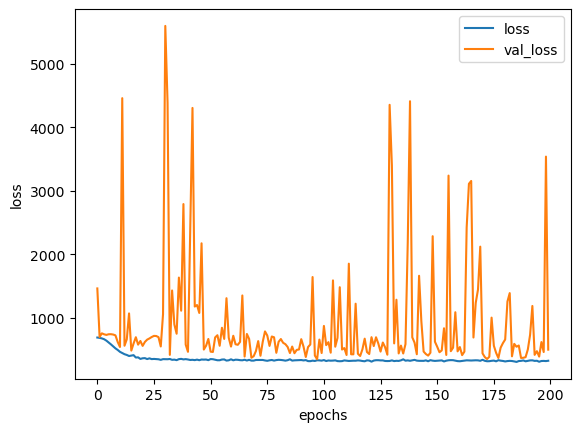

In [137]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [126]:
# 확인용도

# 오차율 몇 %로...?
pred = model.predict(독립_2023).round(0)
# 여기랑 비슷한지 보기
종속_2023['pred'] = pred
종속_2023['오차율'] = (abs(종속_2023['전국 관객수'] - 종속_2023['pred'])) / 종속_2023['전국 관객수'] * 100
len(종속_2023.loc[종속_2023['오차율']>20])

1/1 [==============================] - 0s 134ms/step


23

In [ ]:
# 여태까지 제일 잘나옴...

X = tf.keras.layers.Input(shape=[9])

H = tf.keras.layers.Dense(256)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

H = tf.keras.layers.Dense(100)(dropout)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

H = tf.keras.layers.Dense(50)(dropout)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

Y = tf.keras.layers.Dense(1)(dropout)
model = tf.keras.models.Model(X,Y)
sgd = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.7)
model.compile(optimizer=sgd,loss='mae')

In [ ]:
# 확인용도
model.predict(train_input[:5])

1/1 [==============================] - 0s 116ms/step


array([[ 17.731884],
       [ 54.481266],
       [ 14.612894],
       [572.9055  ],
       [173.16061 ]], dtype=float32)

In [84]:
# 여기랑 비슷한지 보기
train_target[:5]

,전국 관객수
2365,31.022
2711,18.241
3041,10.859
544,1125.739
789,618.598


### test data 확인용도

In [85]:
# 확인용도

# 오차율 몇 %로...?
pred = model.predict(독립_2023).round(0)
# 여기랑 비슷한지 보기
종속_2023['pred'] = pred
종속_2023['오차율'] = (abs(종속_2023['전국 관객수'] - 종속_2023['pred'])) / 종속_2023['전국 관객수'] * 100
len(종속_2023.loc[종속_2023['오차율']>20])

1/1 [==============================] - 0s 16ms/step


21

In [86]:
종속_2023[:]

,전국 관객수,pred,오차율
378,1720.865,1070.0,37.821967
465,1376.493,2244.0,63.022987
670,829.268,484.0,41.635274
755,663.836,761.0,14.636748
1009,398.964,471.0,18.055764
1071,346.265,201.0,41.951973
1188,274.283,523.0,90.678970
1240,241.148,397.0,64.629190
1265,229.558,207.0,9.826710
1355,198.100,373.0,88.288743
